#  Data Science Project 2022/2023

### Eya Daoud - Imed Moussa 

# Face Recognition 


In [157]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image

import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from os import listdir
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [165]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# 1.Data Analysis

**1) Data Sample**

(569, 474, 3, 3)


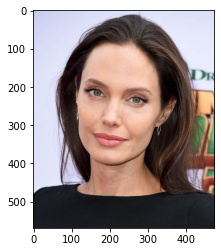

In [3]:
filename = "Celebrity Faces Dataset/Angelina Jolie/001_fe3347c0.jpg"
pixels = plt.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

**2) MTCNN**

In [4]:
detector = MTCNN()

results = detector.detect_faces(pixels)
results

1/1 [==============================] - 0s 103ms/step


[{'box': [110, 85, 218, 314],
  'confidence': 0.9999710321426392,
  'keypoints': {'left_eye': (164, 215),
   'right_eye': (271, 235),
   'nose': (197, 287),
   'mouth_left': (152, 322),
   'mouth_right': (249, 339)}},
 {'box': [412, 238, 55, 86],
  'confidence': 0.7962949872016907,
  'keypoints': {'left_eye': (433, 273),
   'right_eye': (459, 276),
   'nose': (451, 293),
   'mouth_left': (433, 306),
   'mouth_right': (453, 308)}}]

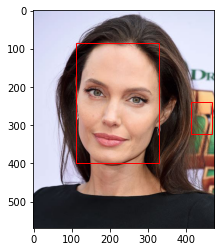

In [5]:
def draw_image_with_boxes(data, result_list):
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    plt.show()

draw_image_with_boxes(pixels, results)

we will use this to train our model on only the faces of our target to reduce features in the images 

**3) Extract and normalise the face pixels**

1/1 [==============================] - 0s 140ms/step


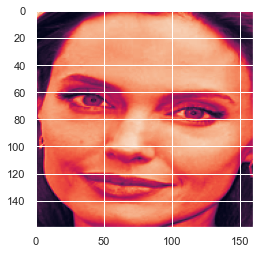

In [148]:
def extract_face_from_file(filename, required_size=(160, 160)):
    image = Image.open(filename)
    
    return extract_face(image, required_size)

def extract_face(image, required_size=(160, 160)):
    image = image.convert('RGB')
    pixels = np.asarray(image)
    results = detector.detect_faces(pixels)

    x1, y1, width, height = results[0]['box']
    
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    face = pixels[y1:y2, x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)
    
    return gray_face

detector = MTCNN()

face_pixels = extract_face_from_file("Celebrity Faces Dataset/Angelina Jolie/001_fe3347c0.jpg")

plt.imshow(face_pixels)

In [7]:
celebrity_list=['Angelina Jolie','Johnny Depp','Megan Fox',"Brad Pitt","Jennifer Lawrence"
]

In [8]:
import os

In [9]:
def Create_df(l):
    df=pd.DataFrame()
    for j in l :
        # Directory containing images
        image_dir = f'Celebrity Faces Dataset/{j}'

        # Create a list of images and labels
        images = []
        labels = []

        # Traverse through the directory
        for root, dirs, files in os.walk(image_dir):

            for file in files:
                # Check if the file is an image (you can customize the condition based on file extensions)

                image_path = os.path.join(root, file)

                class_name = j

                img = extract_face_from_file(image_path)
                

                img_array = np.array(img)
                img_array =img_array.reshape((img_array.shape[0],img_array.shape[1],1))
                
                # Reshape the array to have a batch dimension
                img_array1 = img_array.reshape((1,img_array.shape[0],img_array.shape[1],1))
                
                # Define data augmentation transformations
                datagen = ImageDataGenerator(
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    fill_mode='nearest',
                )


                # Generate augmented images
                aug_iter = datagen.flow(img_array1, batch_size=1)
                aug_images = [next(aug_iter)[0].astype('uint8') for i in range(3)]
                for i, img in enumerate(aug_images):
                    # Add the augmented image and label to the lists
                    images.append(img)

                    labels.append(class_name)
                
                images.append(img_array)

                labels.append(class_name)

        # Convert the lists to numpy arrays
        images = np.array(images)
        labels = np.array(labels)
        print(images[0].shape)

        # Create a pandas DataFrame
        df1 = pd.DataFrame({"image": list(images), "label": labels})
        df=pd.concat([df,df1])
    
    return df

In [10]:
df=Create_df(celebrity_list)

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 16ms/step


2/2 [==============================] - 0s 5ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 19ms/step
(160, 160, 1)
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 21ms/step
(160, 160, 1)
1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 18ms/step
(160, 160, 1)
1/1 [==============================] - 0s 16ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 27ms/step
(160, 160, 1)
1/1 [==============================] - 0s 17ms/step


2/2 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 17ms/step


3/3 [==============================] - 0s 7ms/step


1/1 [==============================] - 0s 50ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 39ms/step
(160, 160, 1)


In [11]:
df=df.reset_index()

In [12]:
l=[]
for i in range(df.shape[0]):
    l.append(np.array(df['image'][i].astype(np.float32)))
    
df['image']=l

In [13]:
# perform one-hot encoding using pandas
one_hot_df = pd.get_dummies(df, columns=['label'])

In [14]:
celebrity_list_labels=['label_'+l for l in celebrity_list]

In [86]:

train_images,test_images, train_labels,  test_labels=train_test_split(one_hot_df['image'], one_hot_df[celebrity_list_labels], test_size=0.15
                                                                     ,random_state=42)

In [89]:
train_images=one_hot_df['image']
train_labels=one_hot_df[celebrity_list_labels]

In [81]:
train_images.shape,train_labels.shape

((2000,), (2000, 5))

In [82]:
train_images = train_images / max_pixel_value

In [18]:
max_pixel_value = 255

train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [19]:
sns.set()

In [83]:
train_images = np.array([np.array(val) for val in train_images])
train_images = tf.cast(train_images, dtype=tf.float32)
train_labels = tf.cast(train_labels , dtype=tf.float32)

In [21]:
test_images = np.array([np.array(val) for val in test_images])
test_images = tf.cast(test_images, dtype=tf.float32)
test_labels = tf.cast(test_labels , dtype=tf.float32)

In [22]:
model = Sequential()
model.add(Conv2D(128, kernel_size = (3, 3), activation='relu', input_shape=(160,160,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())


model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())




model.add(Dropout(0.2))

# add the dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(5, activation='softmax'))

In [23]:
model.compile(
    loss = 'categorical_crossentropy',
   optimizer='rmsprop',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 158, 158, 128)     1280      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 79, 79, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 79, 79, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_25 (Conv2D)          (None, 77, 77, 64)        73792     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                            
                                                        

## Visualizing Our Convultional Neural Network Architectures

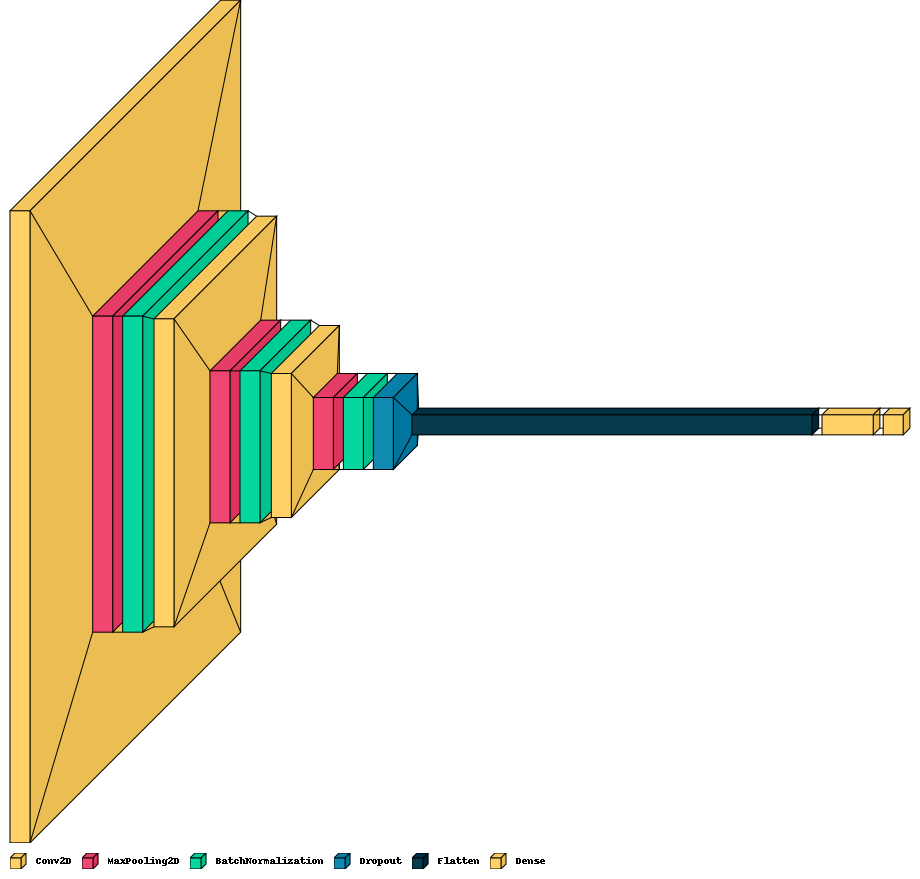

In [24]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True)

In [25]:
# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [26]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    'best_model.h5',  # File to save the model
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max'  # Mode of the monitored metric (max or min)
)

In [27]:
# Train the model
training_history = model.fit(train_images, train_labels,
                epochs=20, batch_size=4,
                validation_data=(test_images, test_labels), callbacks=[checkpoint_callback,early_stop])

Epoch 1/20
500/500 [==============================] - 196s 390ms/step - loss: 2.8562 - accuracy: 0.4440 - val_loss: 1.6769 - val_accuracy: 0.4533
Epoch 2/20
500/500 [==============================] - 203s 405ms/step - loss: 1.1137 - accuracy: 0.6330 - val_loss: 1.3466 - val_accuracy: 0.6367
Epoch 3/20
500/500 [==============================] - 204s 408ms/step - loss: 0.7348 - accuracy: 0.7600 - val_loss: 1.0143 - val_accuracy: 0.6767
Epoch 4/20
500/500 [==============================] - 195s 389ms/step - loss: 0.4063 - accuracy: 0.8675 - val_loss: 1.4307 - val_accuracy: 0.5933
Epoch 5/20
500/500 [==============================] - 194s 388ms/step - loss: 0.2551 - accuracy: 0.9195 - val_loss: 0.2273 - val_accuracy: 0.9233
Epoch 6/20
500/500 [==============================] - 193s 386ms/step - loss: 0.1602 - accuracy: 0.9475 - val_loss: 0.8411 - val_accuracy: 0.7533
Epoch 7/20
500/500 [==============================] - 193s 387ms/step - loss: 0.0786 - accuracy: 0.9790 - val_loss: 0.0277 -

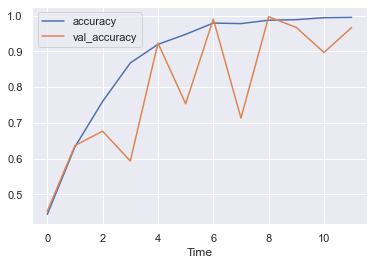

In [28]:
plt.figure(figsize=(6,4))
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.xlabel('Time')
plt.legend(['accuracy','val_accuracy'])
plt.show()

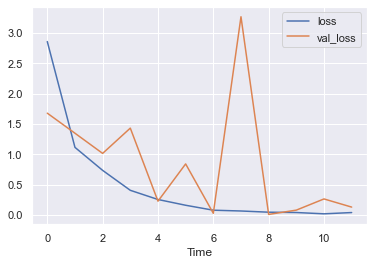

In [29]:
plt.figure(figsize=(6,4))
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.xlabel('Time')
plt.legend(['loss','val_loss'])
plt.show()

In [85]:
# Make predictions on the training data
predicted_probs = model.predict(train_images)  # Replace 'model' with your trained model

# Convert predicted probabilities to predicted labels
predicted_labels = np.argmax(predicted_probs, axis=1)

63/63 [==============================] - 71s 1s/step


In [90]:
train1_labels=np.argmax(train_labels, axis=1)

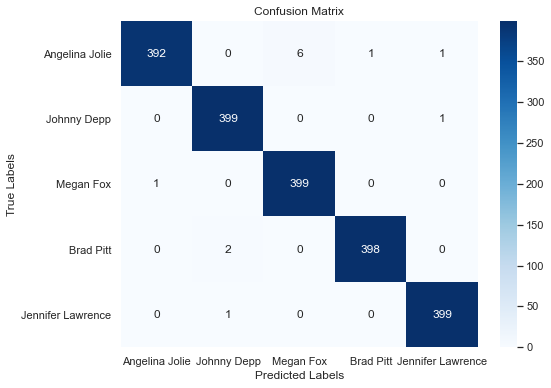

In [91]:
# Create a confusion matrix
cm = confusion_matrix(train1_labels, predicted_labels)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=celebrity_list, yticklabels=celebrity_list)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [167]:
def predict_image(image_path):
    
    img = extract_face_from_file(image_path)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x=x/max_pixel_value
    images = np.vstack([x])
    pixels = plt.imread(image_path)
    rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
    plt.imshow(pixels)
    plt.show()
    pred = model.predict(images, batch_size=4)
    if(max(pred[0])<0.4):
       # print("Actual: "+(image_path.split("/")[-1]))
        print("Predicted: UNKNOWN")      
    else:   
        print(pred)
       # print("Actual: "+(image_path.split("/")[-1]))
        print("Predicted: "+celebrity_list[np.argmax(pred[0])])

In [168]:
sns.reset_orig()

1/1 [==============================] - 0s 48ms/step


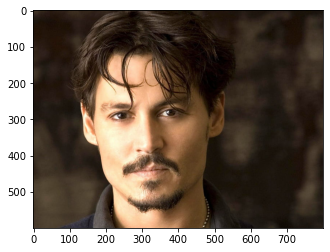

1/1 [==============================] - 0s 85ms/step
[[0.0000000e+00 1.0000000e+00 4.2835306e-21 1.7474678e-20 1.9498280e-35]]
Predicted: Johnny Depp


In [169]:
predict_image("Test_JohnnyDepp.jpg")

1/1 [==============================] - 0s 37ms/step


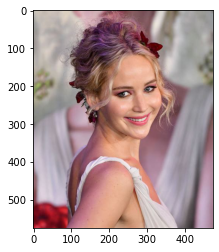

1/1 [==============================] - 0s 64ms/step
[[7.4659246e-15 2.3814513e-15 2.7799616e-13 3.3409044e-15 1.0000000e+00]]
Predicted: Jennifer Lawrence


In [33]:
predict_image("Celebrity Faces Dataset/Jennifer Lawrence/007_72ad75ba.jpg")

 # $\mathrm{II}$) Emotion Detection :

In [34]:
import os 
import pathlib

In [35]:
data_dir = pathlib.Path("Emotion Dataset/train")
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)
# classnames in the dataset specified
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt" ])
print(CLASS_NAMES)
# print length of class names
output_class_units = len(CLASS_NAMES)
print(output_class_units)

28709
['angry' 'disgusted' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
7


In [36]:
data_dir2 = pathlib.Path("Emotion Dataset/test")

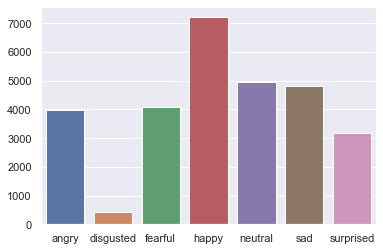

In [37]:
sns.set()
train_count=[]
for i in CLASS_NAMES:
    train_count.append(len(os.listdir("Emotion Dataset/train/"+i+"/")))

sns.barplot(x=CLASS_NAMES, y=train_count)
# Display the plot
plt.show()

In [44]:
l1=['angry' , 'disgusted' , 'fearful' , 'happy' , 'neutral' , 'sad' , 'surprised']

we will get only 500 example of each emotion

In [38]:
def extract_file(filename, required_size=(160, 160)):
    image = Image.open(filename)
    image = image.convert('RGB')
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)
    
    return gray_face
    
    return extract_face(image, required_size)


In [46]:
def Create_df1(l):
    df=pd.DataFrame()
    for j in l :
        
        # Directory containing images
        image_dir = f'Emotion Dataset/train/{j}'

        # Create a list of images and labels
        images = []
        labels = []

        # Traverse through the directory
        for root, dirs, files in os.walk(image_dir):
            i=0

            for file in files:
                if(i>500):
                    break 
                i+=1
                # Check if the file is an image (you can customize the condition based on file extensions)

                image_path = os.path.join(root, file)

                class_name = j

                img = extract_file(image_path)
                

                img_array = np.array(img)
                img_array =img_array.reshape((img_array.shape[0],img_array.shape[1],1))
                
                # Reshape the array to have a batch dimension
                img_array1 = img_array.reshape((1,img_array.shape[0],img_array.shape[1],1))
                
                # Define data augmentation transformations
                datagen = ImageDataGenerator(
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    fill_mode='nearest',
                )


                # Generate augmented images
                """aug_iter = datagen.flow(img_array1, batch_size=1)
                aug_images = [next(aug_iter)[0].astype('uint8') for i in range(1)]
                for i, img in enumerate(aug_images):
                    # Add the augmented image and label to the lists
                    images.append(img)

                    labels.append(class_name)"""
                
                images.append(img_array)

                labels.append(class_name)

        # Convert the lists to numpy arrays
        images = np.array(images)
        labels = np.array(labels)

        # Create a pandas DataFrame
        df1 = pd.DataFrame({"image": list(images), "label": labels})
        df=pd.concat([df,df1])
    
    return df

In [47]:
Edf=Create_df1(l1)

In [48]:
Edf=Edf.reset_index()

In [51]:
Edf.head()

,index,image,label
0,0,"[[[69], [71], [73], [76], [81], [83], [84], [8...",angry
1,1,"[[[151], [151], [151], [151], [150], [150], [1...",angry
2,2,"[[[117], [117], [117], [117], [116], [116], [1...",angry
3,3,"[[[159], [159], [160], [161], [162], [159], [1...",angry
4,4,"[[[254], [254], [254], [254], [254], [254], [2...",angry


In [52]:
l=[]
for i in range(Edf.shape[0]):
    l.append(np.array(Edf['image'][i].astype(np.float32)))
    
Edf['image']=l

In [53]:
# perform one-hot encoding using pandas
one_hot_Edf = pd.get_dummies(Edf, columns=['label'])
Emotions_labels=['label_'+l for l in l1]

In [54]:
train_images,test_images, train_labels,  test_labels=train_test_split(one_hot_Edf['image'], one_hot_Edf[Emotions_labels], test_size=0.15
                                                                     ,random_state=42)

In [55]:
train_images=one_hot_Edf['image']
train_labels=one_hot_Edf[Emotions_labels]

In [56]:
max_pixel_value=255

In [57]:
train_images = train_images / max_pixel_value
test_images = test_images / max_pixel_value

In [58]:
train_images = np.array([np.array(val) for val in train_images])
train_images = tf.cast(train_images, dtype=tf.float32)
train_labels = tf.cast(train_labels , dtype=tf.float32)

In [59]:
test_images = np.array([np.array(val) for val in test_images])
test_images = tf.cast(test_images, dtype=tf.float32)
test_labels = tf.cast(test_labels , dtype=tf.float32)

In [60]:
model2 = Sequential()
model2.add(Conv2D(128, kernel_size = (3, 3), activation='relu', input_shape=(160,160,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())


model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())


model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(BatchNormalization())




model2.add(Dropout(0.2))

# add the dense layers
model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
#model.add(Dropout(0.25))
model2.add(Dense(7, activation='softmax'))

In [61]:
model2.compile(
    loss = 'categorical_crossentropy',
   optimizer='rmsprop',
    metrics = ["accuracy"])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 158, 158, 128)     1280      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 79, 79, 128)      0         
 g2D)                                                            
                                                                 
 batch_normalization_3 (Batc  (None, 79, 79, 128)      512       
 hNormalization)                                                 
                                                                 
 conv2d_28 (Conv2D)          (None, 77, 77, 64)        73792     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 38, 38, 64)       0         
 g2D)                                                            
                                                      

In [62]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    'best_model2.h5',  # File to save the model
    monitor='val_accuracy',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='max'  # Mode of the monitored metric (max or min)
)

In [64]:
# Train the model
training_history = model2.fit(train_images, train_labels,
                epochs=10, batch_size=4,
                validation_data=(test_images, test_labels), callbacks=[checkpoint_callback,early_stop])

Epoch 1/10
861/861 [==============================] - 578s 671ms/step - loss: 2.3217 - accuracy: 0.2368 - val_loss: 2.2124 - val_accuracy: 0.2379
Epoch 2/10
861/861 [==============================] - 586s 681ms/step - loss: 1.7590 - accuracy: 0.3591 - val_loss: 2.0878 - val_accuracy: 0.2959
Epoch 3/10
861/861 [==============================] - 600s 697ms/step - loss: 1.4531 - accuracy: 0.4805 - val_loss: 1.2797 - val_accuracy: 0.5300
Epoch 4/10
861/861 [==============================] - 594s 689ms/step - loss: 1.0721 - accuracy: 0.6386 - val_loss: 1.0756 - val_accuracy: 0.6015
Epoch 5/10
861/861 [==============================] - 590s 685ms/step - loss: 0.7052 - accuracy: 0.7592 - val_loss: 0.9487 - val_accuracy: 0.6634
Epoch 6/10
861/861 [==============================] - 529s 615ms/step - loss: 0.4313 - accuracy: 0.8591 - val_loss: 0.7281 - val_accuracy: 0.7253
Epoch 7/10
861/861 [==============================] - 467s 542ms/step - loss: 0.2195 - accuracy: 0.9294 - val_loss: 0.7665 -

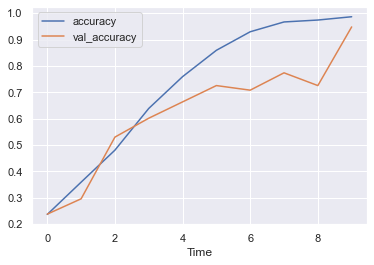

In [65]:
plt.figure(figsize=(6,4))
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.xlabel('Time')
plt.legend(['accuracy','val_accuracy'])
plt.show()

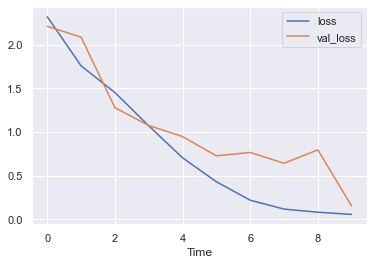

In [66]:
plt.figure(figsize=(6,4))
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.xlabel('Time')
plt.legend(['loss','val_loss'])
plt.show()

In [76]:
# Make predictions on the training data
predicted_probs = model2.predict(train_images)  # Replace 'model' with your trained model

# Convert predicted probabilities to predicted labels
predicted_labels = np.argmax(predicted_probs, axis=1)

108/108 [==============================] - 122s 1s/step


In [77]:
train1_labels=np.argmax(train_labels, axis=1)

In [78]:
from sklearn.metrics import confusion_matrix

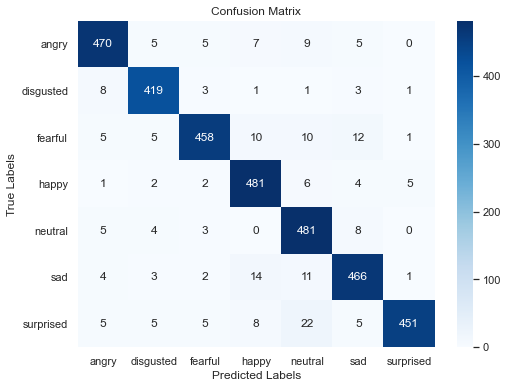

In [79]:

# Create a confusion matrix
cm = confusion_matrix(train1_labels, predicted_labels)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=l1, yticklabels=l1)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [95]:
def predict_emotion(image_path):
    
    img = extract_face_from_file(image_path)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x=x/max_pixel_value
    images = np.vstack([x])
    pixels = plt.imread(image_path)
    rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
    plt.imshow(pixels)
    plt.show()
    pred = model2.predict(images, batch_size=4)
       
    print(pred)
    # print("Actual: "+(image_path.split("/")[-1]))
    print("Predicted: "+l1[np.argmax(pred[0])])

1/1 [==============================] - 0s 40ms/step


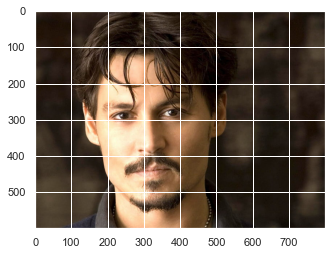

1/1 [==============================] - 0s 76ms/step
[[5.4951197e-01 5.0850853e-04 2.2773292e-04 3.0465614e-07 4.4973469e-01
  1.6762651e-05 6.5033518e-08]]
Predicted: angry


In [96]:
predict_emotion("Test_JohnnyDepp.jpg")

In [114]:
from mtcnn import MTCNN

# Load the pre-trained MTCNN model
mtcnn = MTCNN()


In [190]:
def extract_faces_from_file(filename, required_size=(160, 160)):
    image = Image.open(filename)
    
    return extract_face1(image, required_size)

def extract_face1(image, required_size=(160, 160)):
    image = image.convert('RGB')
    pixels = np.asarray(image)
    results = detector.detect_faces(pixels)
    imgs=[]
    for i in range(len(results)):
        
        x1, y1, width, height = results[i]['box']
    
        x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + width, y1 + height

        face = pixels[y1:y2, x1:x2]
        image = Image.fromarray(face)
        image = image.resize(required_size)
        face_array = np.asarray(image)
        gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)
        imgs.append(gray_face)

    
    
    return imgs

In [220]:
def final_Predction(image_path):
    imgs = extract_faces_from_file(image_path)
    for img in imgs :
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x=x/max_pixel_value
        images = np.vstack([x])
        pixels = plt.imread(image_path)
        rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
        plt.imshow(pixels)
        plt.show()
        pred = model2.predict(images, batch_size=4)
        pred1= model.predict(images, batch_size=4)
        print(pred1)
        if(max(pred1[0])<0.5):
           # print("Actual: "+(image_path.split("/")[-1]))
            print("UNKNOWN is {}".format(l1[np.argmax(pred[0])]))    
        else:
            print("{} is {}".format(celebrity_list[np.argmax(pred1[0])],l1[np.argmax(pred[0])]))

1/1 [==============================] - 0s 66ms/step


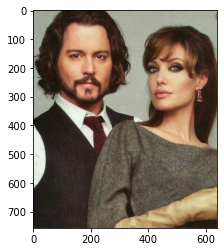

1/1 [==============================] - 0s 79ms/step
[[3.6348028e-03 2.1782636e-05 4.2033225e-02 5.2438742e-03 8.9876831e-01
  4.9678005e-02 6.2006013e-04]]
Predicted: neutral


In [221]:
predict_emotion("test.jpg")

1/1 [==============================] - 0s 63ms/step


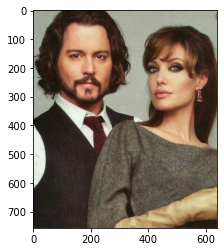

1/1 [==============================] - 0s 82ms/step
[[2.5789090e-13 9.9999869e-01 2.2764947e-10 1.3332151e-06 2.8256235e-08]]
Johnny Depp is neutral


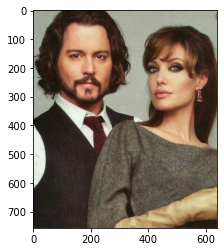

1/1 [==============================] - 0s 89ms/step
[[6.5550816e-01 6.0090106e-06 2.6018646e-01 8.7406329e-04 8.3425350e-02]]
Angelina Jolie is happy


In [222]:
final_Predction("test.jpg")